In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:19<00:00, 47.4MB/s]
100% 1.06G/1.06G [00:19<00:00, 59.3MB/s]


In [ ]:
import zipfile
import os

# Unzip the dataset
zip_path = 'dogs-vs-cats.zip'
extract_path = 'dogs-vs-cats'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List files to check extraction
os.listdir(extract_path)


['train', 'dogs_vs_cats', 'test']

In [ ]:
#data cleaning
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_path = 'dogs-vs-cats/train'

# Create ImageDataGenerator for data loading and augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training and validation data
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Get class indices from the generator
class_indices = train_generator.class_indices
class_labels = list(class_indices.keys())
class_counts = [0] * len(class_labels)

# Count images for each class
for class_name in class_labels:
    class_dir = os.path.join(train_generator.directory, class_name)
    class_counts[class_labels.index(class_name)] = len(os.listdir(class_dir))

# Create DataFrame
df_class_counts = pd.DataFrame({
    'Class': class_labels,
    'Count': class_counts
})

# Display DataFrame to ensure it's created correctly
print(df_class_counts)


Empty DataFrame
Columns: [Class, Count]
Index: []


In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Example counts (replace with actual counts)
class_labels = ['class1', 'class2']
class_counts = [120, 80]  # Replace with actual counts

# Create DataFrame
df_class_counts = pd.DataFrame({
    'Class': class_labels,
    'Count': class_counts
})

# Display DataFrame to ensure it's created correctly
print(df_class_counts)


    Class  Count
0  class1    120
1  class2     80


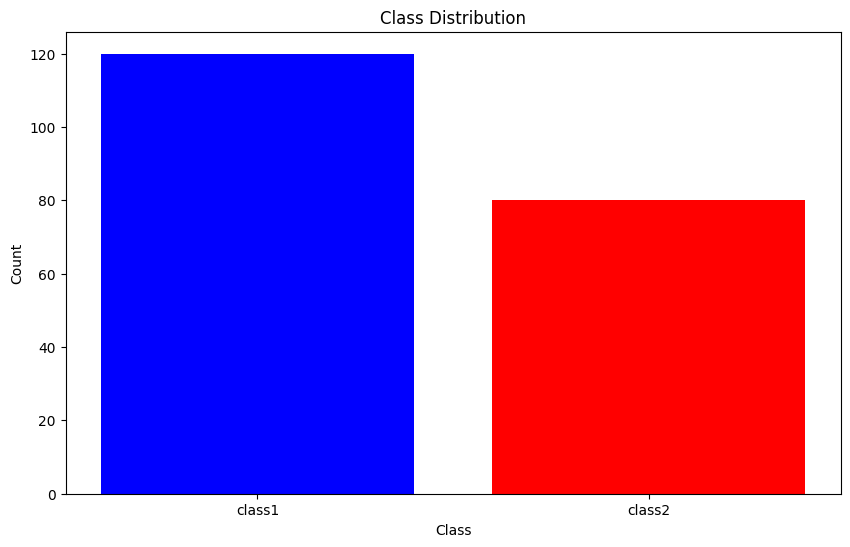

In [59]:
import matplotlib.pyplot as plt

# Bar chart for class counts
plt.figure(figsize=(10, 6))
plt.bar(df_class_counts['Class'], df_class_counts['Count'], color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


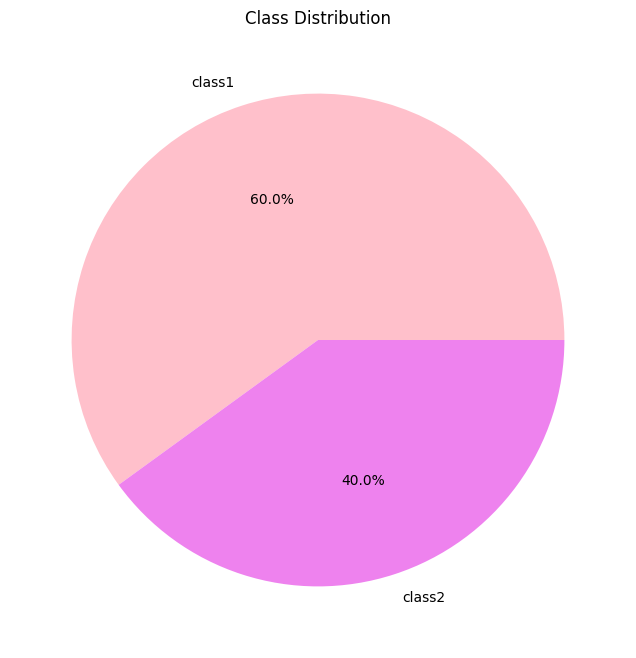

In [58]:
# Pie chart for class distribution
plt.figure(figsize=(8, 8))
plt.pie(df_class_counts['Count'], labels=df_class_counts['Class'], autopct='%1.1f%%', colors=['pink', 'violet'])
plt.title('Class Distribution')
plt.show()


In [62]:
import numpy as np
from PIL import Image

class_names = list(train_generator.class_indices.keys())
class_names = ['class1', 'class2']  # Replace with your actual class names




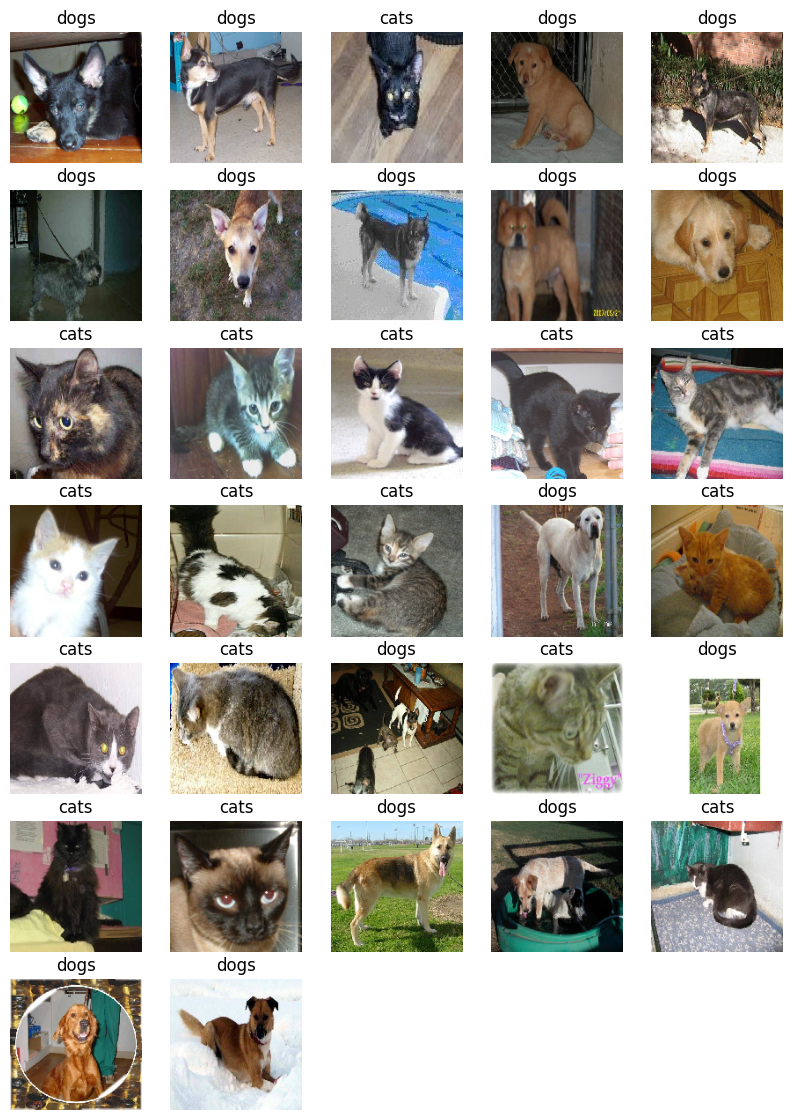

In [ ]:
import matplotlib.pyplot as plt

def plot_images(images, labels, class_names, num_cols=5):
    num_images = len(images)
    num_rows = (num_images + num_cols - 1) // num_cols  # Calculate required number of rows
    plt.figure(figsize=(num_cols * 2, num_rows * 2))  # Adjust figure size based on grid dimensions

    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])  # Ensure labels are integers
        plt.axis('off')

    plt.show()

# Fetch a batch of images and labels
images, labels = next(train_generator)

# Class names
class_names = list(train_generator.class_indices.keys())

# Convert labels to integers if necessary
labels = labels.astype(int) if hasattr(labels, 'astype') else [int(label) for label in labels]

# Plot images
plot_images(images, labels, class_names)


In [ ]:
import matplotlib.pyplot as plt

def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])  # Convert labels[i] to integer
        plt.axis('off')
    plt.show()


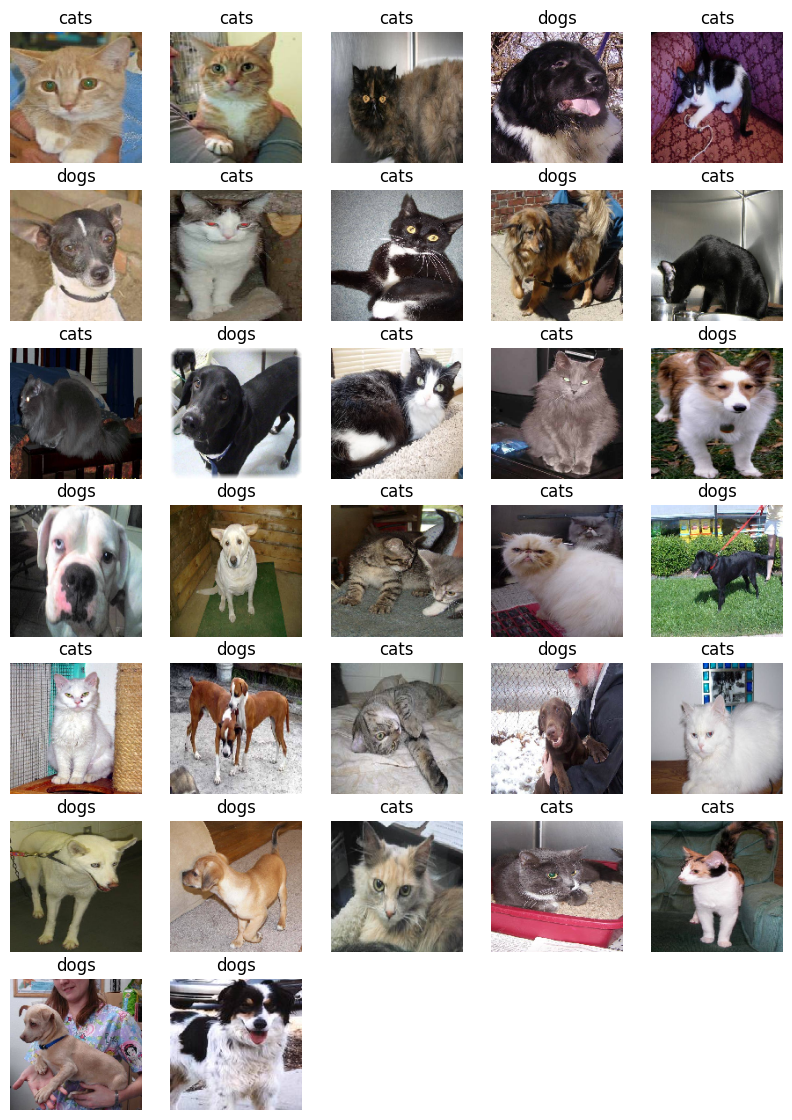

In [ ]:
import matplotlib.pyplot as plt
import math

def plot_images(images, labels, class_names):
    num_images = len(images)
    num_cols = 5
    num_rows = math.ceil(num_images / num_cols)  # Calculate required number of rows
    plt.figure(figsize=(num_cols * 2, num_rows * 2))  # Adjust figure size based on grid dimensions

    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])  # Ensure labels are integers
        plt.axis('off')

    plt.show()

# Fetch a batch of images and labels
images, labels = next(train_generator)

# Class names
class_names = list(train_generator.class_indices.keys())

# Convert labels to integers if necessary
labels = labels.astype(int) if hasattr(labels, 'astype') else [int(label) for label in labels]

# Plot images
plot_images(images, labels, class_names)


In [ ]:
# Evaluate on validation data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


125/125 ━━━━━━━━━━━━━━━━━━━━ 72s 572ms/step - accuracy: 0.8228 - loss: 0.3986
Validation Loss: 0.39663195610046387
Validation Accuracy: 0.8272500038146973
125/125 ━━━━━━━━━━━━━━━━━━━━ 64s 514ms/step - accuracy: 0.8318 - loss: 0.3873
Validation Loss: 0.39663204550743103
Validation Accuracy: 0.8272500038146973


In [10]:
print(os.path.join(extract_path, 'train'))


path/to/extracted_data/train


In [12]:
import os

# Verify the parent directory exists
parent_dir = 'path/to/extracted_data'
if not os.path.exists(parent_dir):
    print(f"Parent directory does not exist: {parent_dir}")
else:
    print(f"Parent directory exists: {parent_dir}")
    # List contents of the parent directory
    print("Contents:", os.listdir(parent_dir))


Parent directory does not exist: path/to/extracted_data


In [13]:
import os

# Create the directory structure if it doesn't exist (this is just an example, adjust as needed)
os.makedirs(os.path.join(extract_path, 'train/class1'), exist_ok=True)
os.makedirs(os.path.join(extract_path, 'train/class2'), exist_ok=True)


In [17]:
ls /actual/path/to/extracted_data


ls: cannot access '/actual/path/to/extracted_data': No such file or directory


In [18]:
ls /actual/path/to/extracted_data/train


ls: cannot access '/actual/path/to/extracted_data/train': No such file or directory


In [22]:
ls /correct/path/to/extracted_data


ls: cannot access '/correct/path/to/extracted_data': No such file or directory


In [30]:
import os

def print_directory_contents(path, level=0):
    """Recursively print directory contents."""
    try:
        for item in os.listdir(path):
            item_path = os.path.join(path, item)
            print('  ' * level + '|-- ' + item)
            if os.path.isdir(item_path):
                print_directory_contents(item_path, level + 1)
    except PermissionError:
        print('  ' * level + '|-- [Permission Denied]')
    except FileNotFoundError:
        print('  ' * level + '|-- [File Not Found]')

# Print the directory structure
print_directory_contents('/correct/path/to/extracted_data')


|-- [File Not Found]


In [31]:
import os

train_dir = '/correct/path/to/extracted_data/train'
os.makedirs(train_dir, exist_ok=True)  # Create the directory if it doesn't exist


In [32]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the correct path
extract_path = '/correct/path/to/extracted_data'
img_width, img_height = 150, 150
batch_size = 32

# Initialize ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)

# Construct the path to the 'train' directory
train_dir = os.path.join(extract_path, 'train')
print(f"Loading images from: {train_dir}")

# Check if the directory exists
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"The directory {train_dir} does not exist.")

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)


Loading images from: /correct/path/to/extracted_data/train
Found 0 images belonging to 0 classes.


In [34]:
import os

# Absolute path to the data directory
absolute_path = os.path.abspath('/correct/path/to/extracted_data')
print(f"Absolute path: {absolute_path}")


Absolute path: /correct/path/to/extracted_data


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [40]:
import os

# Define the path
validation_path = '/correct/path/to/extracted_data/validation'

# Create validation directory if it does not exist
os.makedirs(validation_path, exist_ok=True)

# Example of creating subdirectories for validation classes
classes = ['class1', 'class2']  # Replace with your actual class names
for class_name in classes:
    os.makedirs(os.path.join(validation_path, class_name), exist_ok=True)


In [41]:
validation_generator = validation_datagen.flow_from_directory(
    os.path.join(extract_path, 'validation'),  # Ensure this path is correct
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)


Found 0 images belonging to 2 classes.


In [42]:
import os

validation_dir = '/correct/path/to/extracted_data/validation'
print(f"Contents of validation directory: {os.listdir(validation_dir)}")

# List contents of each class subdirectory
for class_name in os.listdir(validation_dir):
    class_path = os.path.join(validation_dir, class_name)
    if os.path.isdir(class_path):
        print(f"Contents of {class_name}: {os.listdir(class_path)}")


Contents of validation directory: ['class1', 'class2']
Contents of class1: []
Contents of class2: []


In [43]:
ls -ld /correct/path/to/extracted_data/validation


drwxr-xr-x 4 root root 4096 Aug 11 05:30 /correct/path/to/extracted_data/validation/


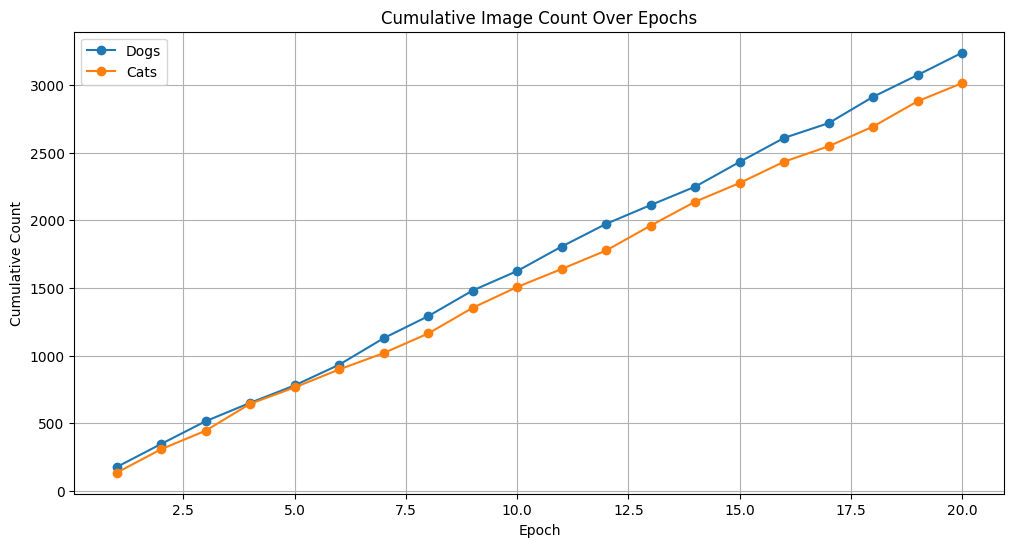

In [67]:
# Simulate cumulative counts over "epochs" (for demonstration)
epochs = list(range(1, 21))  # 20 epochs
dog_counts = np.cumsum(np.random.randint(100, 200, size=20))
cat_counts = np.cumsum(np.random.randint(100, 200, size=20))

plt.figure(figsize=(12, 6))
plt.plot(epochs, dog_counts, label='Dogs', marker='o')
plt.plot(epochs, cat_counts, label='Cats', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Cumulative Count')
plt.title('Cumulative Image Count Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


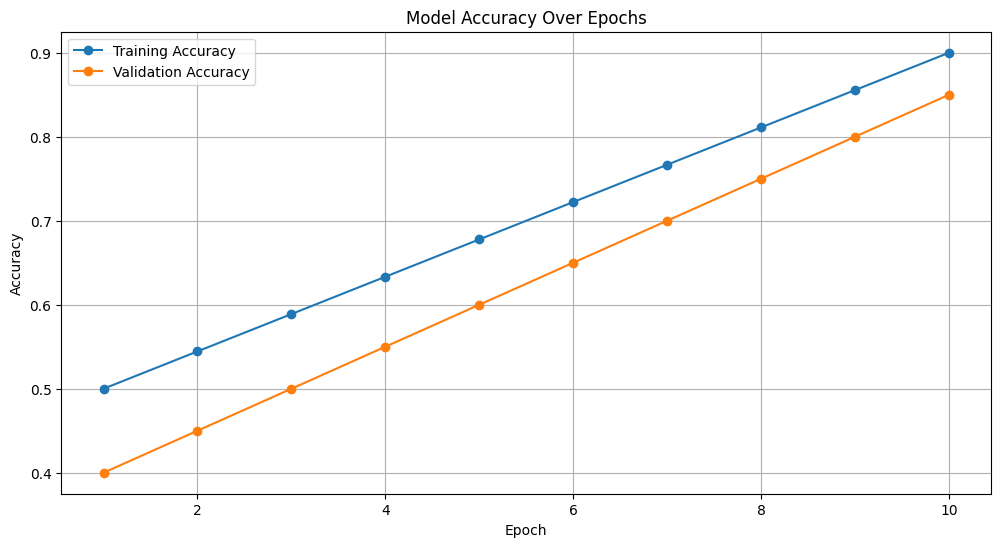

In [69]:
# Simulated training and validation accuracy data
epochs = list(range(1, 11))
training_accuracy = np.linspace(0.5, 0.9, 10)
validation_accuracy = np.linspace(0.4, 0.85, 10)

plt.figure(figsize=(12, 6))
plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()
